## 분석
### ● 월별 집들이 글 평균 조회수
### ● 조회수 구간별 집들이글 인기 카테고리
####      : 조회수 20000 ~ 50000 : 최근 1년간 게시글에 많이 태깅된 상품 카테고리
### ● 최근 1년 집들이 글에 태깅된 상품 카테고리별 평균 금액
### ● 집단별 집들이 글 포스팅 흐름 (싱글라이프, 신혼부부, 아기가 있는 집)

In [7]:
import pandas as pd

prd = pd.read_csv("hou_prd_details.csv")
house = pd.read_csv("housewarming2.csv")

prd = prd.drop('Unnamed: 0', axis = 1)
prd_details_fixed = pd.read_csv('prd_details_fixed.csv')
prd_style_match = pd.read_csv('prd_style_match.csv')

prd_details_fixed = prd_details_fixed.drop('Unnamed: 0', axis = 1)
# house = house.drop('Unnamed: 0', axis = 1)
# house.head(10)

In [208]:
house['공간'].value_counts()

아파트        2987
원룸&오피스텔     646
단독주택        571
빌라&연립       452
기타          219
상업공간         15
사무공간         10
Name: 공간, dtype: int64

In [9]:
house['작성월']=house['작성일'].apply(lambda x : x[:7])

In [10]:
prd_style_match # 95916 (분위기)

,상품명,분위기
0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),러블리&로맨틱
1,벤트라이크 멀티플 접이식 세발자전거+안전가드,모미내
2,FLENSTED MOBILES 모빌 - 천사 Angel mobile,모미내
3,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,모미내
4,리스 클래식 법랑 양수냄비 22cm(H),모미내
...,...,...
95911,실크스크린 아트포스터 3종 Journey Collection 01-03,유니크&믹스매치
95912,HUSVIKA 후스비카 스프링매트리스 603.188.64,유니크&믹스매치
95913,악세스시리즈01 한정판 아트포스터,유니크&믹스매치
95914,[해외]Sand Rug 01,유니크&믹스매치


In [23]:
prd_details_fixed.head()

,id,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0
1,0,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0
2,0,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0
3,0,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0
4,0,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0


In [11]:
prd_details_fixed.head()
# prd_details_fixed.info()   # 231390

,id,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0
1,0,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0
2,0,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0
3,0,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0
4,0,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0


In [12]:
prd_details = prd_details_fixed.merge(prd_style_match, how='left', on='상품명')
prd_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231390 entries, 0 to 231389
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      231390 non-null  int64  
 1   상품url   231390 non-null  object 
 2   브랜드명    231390 non-null  object 
 3   상품명     231390 non-null  object 
 4   카테고리    231390 non-null  object 
 5   상품가격    157154 non-null  float64
 6   리뷰수     148713 non-null  float64
 7   스크랩수    231112 non-null  float64
 8   스타일링샷수  231363 non-null  float64
 9   분위기     227131 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 19.4+ MB


In [13]:
house2 = house.merge(prd_details, how='inner', on='id')
house2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231390 entries, 0 to 231389
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      231390 non-null  int64  
 1   작성일     231390 non-null  object 
 2   제목      231390 non-null  object 
 3   가족형태    231390 non-null  object 
 4   공간      231390 non-null  object 
 5   평수구간    231390 non-null  int64  
 6   스타일     231390 non-null  object 
 7   세부공사    231390 non-null  object 
 8   분야      231390 non-null  object 
 9   작업      231390 non-null  object 
 10  예산      231390 non-null  int64  
 11  조회      231390 non-null  int64  
 12  스크랩     231390 non-null  int64  
 13  좋아요     231390 non-null  int64  
 14  댓글      231390 non-null  int64  
 15  url     231390 non-null  object 
 16  작성월     231390 non-null  object 
 17  상품url   231390 non-null  object 
 18  브랜드명    231390 non-null  object 
 19  상품명     231390 non-null  object 
 20  카테고리    231390 non-null  object 
 21  상품가격    15

In [6]:
house2.to_csv("house2.csv")

#### house2
- 포스팅 글별 태깅 상품 분위기O

In [7]:
house2.columns

Index(['id', '작성일', '제목', '가족형태', '공간', '평수구간', '스타일', '세부공사', '분야', '작업',
       '예산', '조회', '스크랩', '좋아요', '댓글', 'url', '상품url', '브랜드명', '상품명', '카테고리',
       '상품가격', '리뷰수', '스크랩수', '스타일링샷수', '분위기'],
      dtype='object')

In [17]:
house.groupby('작성월')['조회'].max()

작성월
2019-10     94423
2019-11    152701
2019-12    251522
2020-01    333111
2020-02    181595
2020-03    271642
2020-04    181318
2020-05    231460
2020-06    286728
2020-07    185745
2020-08    226814
2020-09    304226
2020-10    272457
2020-11    180914
2020-12    305405
2021-01    356991
2021-02    358098
2021-03    254286
2021-04    364484
2021-05    223390
2021-06    222167
2021-07    264300
2021-08    296333
2021-09    228891
2021-10    274829
2021-11    155981
2021-12    213933
2022-01    143527
2022-02    281100
2022-03     90123
2022-04     95538
2022-05     95308
2022-06     91862
2022-07     81159
2022-08    112059
2022-09     50734
2022-10     96800
Name: 조회, dtype: int64

In [19]:
house.groupby('작성월')['조회'].min()

작성월
2019-10    22343
2019-11    13997
2019-12    16606
2020-01    15130
2020-02    20931
2020-03    26210
2020-04    24230
2020-05    21090
2020-06    15713
2020-07    20147
2020-08    21445
2020-09    26625
2020-10    18960
2020-11    18517
2020-12    16692
2021-01    17129
2021-02    22426
2021-03    12530
2021-04     9399
2021-05    10497
2021-06    21284
2021-07    21125
2021-08    14839
2021-09     9218
2021-10    11418
2021-11    13792
2021-12    13040
2022-01    11844
2022-02    12621
2022-03     7662
2022-04     4869
2022-05     4470
2022-06     3037
2022-07     4506
2022-08     8127
2022-09     4725
2022-10     2227
Name: 조회, dtype: int64

2022-01    143527\
2022-02    281100\
2022-03     90123\
2022-04     95538\
2022-05     95308\
2022-06     91862\
2022-07     81159\
2022-08    112059\
2022-09     50734\
2022-10     96800\
Name: 조회, dtype: int64

In [22]:
house2[:][house2['조회']==143527].sort_values(by='스크랩수', ascending=False)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,분위기
92729,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/191794/selling,슈나츠,완판 세라믹코팅 주방칼 6종세트 + 도마증정,"['주방용품', '칼·커팅기구', '칼세트']",31900.0,13245.0,97115.0,9630.0,러블리&로맨틱
92717,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/48753/selling,리샘,일반/대형 전신거울 3colors,"['가구', '거울', '전신거울']",31900.0,1225.0,73545.0,1395.0,유니크&믹스매치
92718,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/309019/selling,양키캔들,모노(MONO) 캔들워머+양키캔들 라지자+전구2개증정(타이머/리모콘/높낮이조절),"['데코·식물', '캔들·디퓨저', '캔들', '캔들']",42900.0,17418.0,55925.0,12833.0,러블리&로맨틱
92719,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/12489/selling,마켓비,MKB 캐비넷 가로양문 TV스탠드 1150590,"['가구', '거실장·TV장', '일반거실장']",95000.0,3488.0,52017.0,3118.0,인더스트리얼
92720,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/303875/selling,마켓비,[5%쿠폰]VIANT 단스탠드 E14 KS2304T 글로브형,"['조명', '단스탠드']",17900.0,1952.0,35945.0,2436.0,모미내
92715,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/239414/selling,postershopkr,Switzerland #1,"['데코·식물', '홈갤러리', '그림·사진', '풍경·자연']",13600.0,1522.0,30517.0,1680.0,프렌치&프로방스
92721,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/349037/selling,오디오테크니카,공식수입원 AT-LP60X 입문용 완전 자동 벨트 드라이브 턴테이블,"['가전', '음향가전', '턴테이블']",179000.0,748.0,21346.0,1203.0,빈티지&레트로
92722,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/653741/selling,공원컴퍼니,리빙 모듈선반 11colors,"['가구', '선반', '스탠드선반']",80000.0,281.0,19949.0,329.0,러블리&로맨틱
92723,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/223618/selling,우디크,케인 매거진 협탁 오크,"['가구', '서랍·수납장', '협탁']",398000.0,186.0,15976.0,404.0,북유럽
92724,1570,2022-01-09,"다섯 개의 중정과 마당이 있는 120평 저택, 다섯 뜰",부모님과 함께 사는 집,단독주택,75,내추럴,0,건축,전문가,0,143527,4714,2106,134,https://ohou.se/projects/71251/detail?affect_t...,2022-01,https://ohou.se/productions/691134/selling,루모스,컬러풀 선셋조명 장스탠드/발리 석양 느낌 무드등(국내 인증제품),"['조명', '무드등·장식조명', '컬러·네온조명']",46500.0,459.0,7536.0,419.0,유니크&믹스매치


In [21]:
house2[:][house2['조회']==2227].sort_values(by='스크랩수', ascending=False)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,분위기
650,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/267218/selling,듀커소파,DK053 3인용 풀커버 패브릭 소파 5colors (스툴 기본포함),"['가구', '소파', '일반소파']",288900.0,4708.0,69871.0,4120.0,러블리&로맨틱
649,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/214970/selling,브릭나인,브릭나인 모니카 암체어 가죽 안락의자 인테리어의자,"['가구', '의자', '인테리어의자']",149000.0,234.0,11059.0,350.0,프렌치&프로방스
648,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/1096436/selling,베스트리빙,[7%쿠폰] 캔버라 1500 타원형 원목식탁 테이블 2colors (의자선택),"['가구', '테이블·식탁·책상', '식탁', '식탁·입식테이블']",129000.0,9.0,922.0,7.0,모미내
651,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/1045993/selling,카르텔,카르텔 콤포니빌리 정리함 - 3 round,"['가구', '서랍·수납장', '수납장']",NaN,NaN,481.0,16.0,모미내
646,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/676266/selling,소안바스,"SA6, 욕실 하부장","['생활용품', '욕실용품', '욕실수납장']",533500.0,NaN,458.0,5.0,북유럽
647,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/918294/selling,메종드보,셀럽 현관 예쁜 노프레임 벽걸이 전신거울,"['가구', '거울', '전신거울']",47300.0,8.0,385.0,12.0,모미내
644,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/545530/selling,나누벨,로니 800 3단 서랍장 3칸 9colors,"['가구', '서랍·수납장', '서랍장']",163800.0,1.0,336.0,1.0,모미내
645,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/1161658/selling,LG전자,LG 프렌치디오스 얼음정수기 냉장고 F625SI15 603L,"['가전', '냉장고', '양문형냉장고']",1169000.0,1.0,300.0,1.0,모미내
641,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/585665/selling,밀레,[3%쿠폰]Miele 밀레 H2860BP 프리미엄 전기 오븐 76L,"['가전', '주방가전', '오븐·전자레인지', '오븐']",2149000.0,NaN,52.0,11.0,러블리&로맨틱
643,10,2022-10-07,페트롤 블루⛵ 3분할로 쪼개고 나눈 아늑한 공간 연출!,기타,빌라&연립,25,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,0,2227,57,5,4,https://ohou.se/projects/72078/detail?affect_t...,2022-10,https://ohou.se/productions/1156974/selling,소호가구,세아스 라운지 의자 SH3740,"['가구', '의자', '인테리어의자']",390000.0,NaN,34.0,0.0,모미내


### 조회수가 높은 집들이 글에 있는 상품 특성들부터 보기

In [15]:
pd.set_option('display.max_columns', None) 
house2.sort_values(by='조회', ascending=False).head(100)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,분위기
161791,2909,2021-04-03,탁 트인 거실과 호텔같은 침실로 꾸민 24평 신혼집,신혼부부,아파트,25,미니멀&심플,"주방리모델링, 중문, 가벽&파티션, 폴리싱타일",리모델링,전문가,0,364484,10294,3777,270,https://ohou.se/projects/37713/detail?affect_t...,2021-04,https://ohou.se/productions/510393/selling,바이레도,스웨이드 (SUEDE) 핸드로션 450ml,"['생필품', '바디케어', '핸드·풋', '핸드크림']",NaN,NaN,87.0,7.0,프렌치&프로방스
161796,2909,2021-04-03,탁 트인 거실과 호텔같은 침실로 꾸민 24평 신혼집,신혼부부,아파트,25,미니멀&심플,"주방리모델링, 중문, 가벽&파티션, 폴리싱타일",리모델링,전문가,0,364484,10294,3777,270,https://ohou.se/projects/37713/detail?affect_t...,2021-04,https://ohou.se/productions/46069/selling,몬타나,팬톤와이어 Panton Wire Black Chrome Cube,"['가구', '서랍·수납장', '수납장']",NaN,NaN,59.0,59.0,모미내
161776,2909,2021-04-03,탁 트인 거실과 호텔같은 침실로 꾸민 24평 신혼집,신혼부부,아파트,25,미니멀&심플,"주방리모델링, 중문, 가벽&파티션, 폴리싱타일",리모델링,전문가,0,364484,10294,3777,270,https://ohou.se/projects/37713/detail?affect_t...,2021-04,https://ohou.se/productions/421554/selling,위미러,노프레임 원형 거울,"['가구', '거울', '벽거울']",48000.0,5.0,380.0,16.0,유니크&믹스매치
161777,2909,2021-04-03,탁 트인 거실과 호텔같은 침실로 꾸민 24평 신혼집,신혼부부,아파트,25,미니멀&심플,"주방리모델링, 중문, 가벽&파티션, 폴리싱타일",리모델링,전문가,0,364484,10294,3777,270,https://ohou.se/projects/37713/detail?affect_t...,2021-04,https://ohou.se/productions/383749/selling,kittybunnypony,Miller Black Tissuebox Cover,[],NaN,NaN,350.0,9.0,북유럽
161778,2909,2021-04-03,탁 트인 거실과 호텔같은 침실로 꾸민 24평 신혼집,신혼부부,아파트,25,미니멀&심플,"주방리모델링, 중문, 가벽&파티션, 폴리싱타일",리모델링,전문가,0,364484,10294,3777,270,https://ohou.se/projects/37713/detail?affect_t...,2021-04,https://ohou.se/productions/315309/selling,키티버니포니,Miller Black Cushion,"['패브릭', '쿠션·방석', '쿠션']",NaN,NaN,329.0,46.0,모미내
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169008,3063,2021-02-28,아파트 맞아요. 전원주택 같은 아파트 1층 리모델링,취학 자녀가 있는 집,아파트,45,0,0,리모델링,전문가,0,358098,16819,6915,545,https://ohou.se/projects/43836/detail?affect_t...,2021-02,https://ohou.se/productions/583314/selling,휘슬러,쓰임새있는 휘슬러 무광 믹싱볼 3종세트 (트레이+채반+믹싱볼 ),"['주방용품', '조리도구·도마', '채반·믹싱볼']",NaN,NaN,12.0,1.0,모미내
169009,3063,2021-02-28,아파트 맞아요. 전원주택 같은 아파트 1층 리모델링,취학 자녀가 있는 집,아파트,45,0,0,리모델링,전문가,0,358098,16819,6915,545,https://ohou.se/projects/43836/detail?affect_t...,2021-02,https://ohou.se/productions/711372/selling,필립스,필립스HD9228/10,"['가전', '주방가전', '에어프라이어·튀김기', '에어프라이어']",NaN,NaN,11.0,3.0,모미내
168978,3063,2021-02-28,아파트 맞아요. 전원주택 같은 아파트 1층 리모델링,취학 자녀가 있는 집,아파트,45,0,0,리모델링,전문가,0,358098,16819,6915,545,https://ohou.se/projects/43836/detail?affect_t...,2021-02,https://ohou.se/productions/469694/selling,베이컨트,Vacant Lamp Collection 001 Black,"['조명', '단스탠드']",NaN,NaN,229.0,8.0,모미내
168995,3063,2021-02-28,아파트 맞아요. 전원주택 같은 아파트 1층 리모델링,취학 자녀가 있는 집,아파트,45,0,0,리모델링,전문가,0,358098,16819,6915,545,https://ohou.se/projects/43836/detail?affect_t...,2021-02,https://ohou.se/productions/712488/selling,핀레이슨,[해외]The Groke towel 크로크 타월 Grey 30x50 cm,"['생활용품', '수건·타월', '세면타월']",NaN,NaN,89.0,1.0,모미내


#### * 고려해야 될 컬럼 : 작성일

In [12]:
house2['작성월']=house2['작성일'].apply(lambda x : x[:7])

In [195]:
house['조회'].mean()

54894.02102040817

In [193]:
hou_month = pd.DataFrame(house.groupby('작성월')['조회'].mean())
hou_month

,조회
작성월,
2019-10,56131.882353
2019-11,59569.292929
2019-12,65765.206522
2020-01,70677.235294
2020-02,68635.287234
2020-03,84476.381356
2020-04,70273.077586
2020-05,69754.800000
2020-06,68064.290598


In [196]:
hou_month['작성월'] = hou_month.index

### > 월별 집들이 글 평균 조회수

In [197]:
hou_month = hou_month.reset_index(drop=True)
hou_month

,조회,작성월
0,56131.882353,2019-10
1,59569.292929,2019-11
2,65765.206522,2019-12
3,70677.235294,2020-01
4,68635.287234,2020-02
5,84476.381356,2020-03
6,70273.077586,2020-04
7,69754.800000,2020-05
8,68064.290598,2020-06
9,63666.280992,2020-07


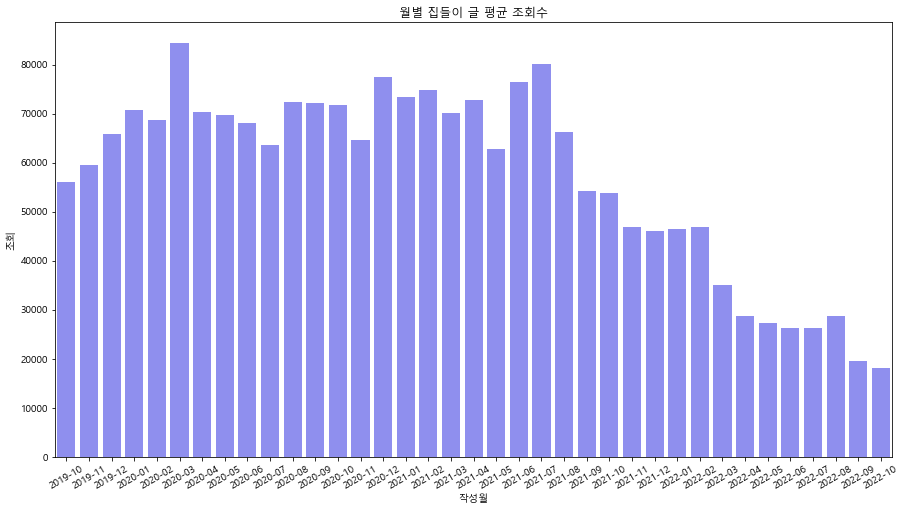

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

plt.figure(figsize = (15,8))
ax = sns.barplot(data=hou_month, x="작성월", y="조회", color='blue', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('월별 집들이 글 평균 조회수')
plt.show()

### > 조회수 구간별 집들이글 인기 카테고리

### > 50000 ~ 90000 : 2020.01 ~ 약 1년 전

In [199]:
interest_cg = pd.DataFrame(house2['카테고리'][(house2['조회']>50000)&(house2['조회']<90000)].apply(lambda x : x.split(',')[0].lstrip('[')))
interest_cg.value_counts()

카테고리   
'가구'       15536
'데코·식물'    14782
'주방용품'     10323
'가전'        8740
'패브릭'       7253
'조명'        4626
'수납·정리'     3799
'생활용품'      2766
'유아·아동'     1647
'생필품'        812
]            616
'반려동물'       476
'캠핑용품'       394
'식품'          13
dtype: int64

### > 20000 ~ 50000 : 최근 1년간 게시글에 많이 태깅된 상품 카테고리

In [200]:
interest_cg2 = pd.DataFrame(house2['카테고리'][(house2['조회']>20000)&(house2['조회']<50000)].apply(lambda x : x.split(',')[0].lstrip('[')))
interest_cg2.value_counts()

카테고리   
'가구'       21006
'데코·식물'    20853
'주방용품'     14529
'가전'       12910
'패브릭'       9484
'조명'        6694
'수납·정리'     5285
'생활용품'      3830
'유아·아동'     2218
'생필품'       1327
'캠핑용품'       732
'반려동물'       716
]            573
'식품'          65
'식품']          2
dtype: int64

#### > 1위 : '가구'       21006
#### > 2위 : '데코·식물'    20853
#### > 3위 : '주방용품'     14529

In [122]:
house2.columns

Index(['id', '작성일', '제목', '가족형태', '공간', '평수구간', '스타일', '세부공사', '분야', '작업',
       '예산', '조회', '스크랩', '좋아요', '댓글', 'url', '상품url', '브랜드명', '상품명', '카테고리',
       '상품가격', '리뷰수', '스크랩수', '스타일링샷수', '분위기', '작성월', 'prd_cg1'],
      dtype='object')

### > 최근 1년 집들이 글에 태깅된 상품 카테고리별 평균 금액

##### 상품 조합 시 금액의 근거로 사용가능할 것 같음.

In [201]:
house2['prd_cg1'] = house2['카테고리'][(house2['조회']>20000)&(house2['조회']<50000)].apply(lambda x : x.split(',')[0].lstrip('['))
house2['상품가격'][house2['prd_cg1']=="'가구'"].mean()         # 319419.53599048185
house2['상품가격'][house2['prd_cg1']=="'데코·식물'"].mean()   #  24333.517201834864
house2['상품가격'][house2['prd_cg1']=="'주방용품'"].mean()     #  30023.58260182584
house2['상품가격'][house2['prd_cg1']=="'가전'"].mean()         #  745443.4538304392
house2['상품가격'][house2['prd_cg1']=="'패브릭'"].mean()       #  39866.214996888615
house2['상품가격'][house2['prd_cg1']=="'조명'"].mean()         # 142817.8619201726

142817.8619201726

- 가구 = 319419원
- 데코·식물 = 24333원
- 주방용품 = 30023원
- 가전 = 745443원
- 패브릭 = 39866원
- 조명 = 142817원

### > 집단별 집들이 글 포스팅 흐름

### > 싱글라이프

In [183]:
hou_single = house[:][house['가족형태']=='싱글라이프']
hou_single = pd.DataFrame(hou_single.groupby('작성월')['id'].count())
hou_single = hou_single.rename(columns={'id':'single_cnt'})
hou_single = hou_single.reset_index()
hou_single

,작성월,single_cnt
0,2019-10,3
1,2019-11,20
2,2019-12,18
3,2020-01,18
4,2020-02,10
5,2020-03,26
6,2020-04,15
7,2020-05,19
8,2020-06,20
9,2020-07,10


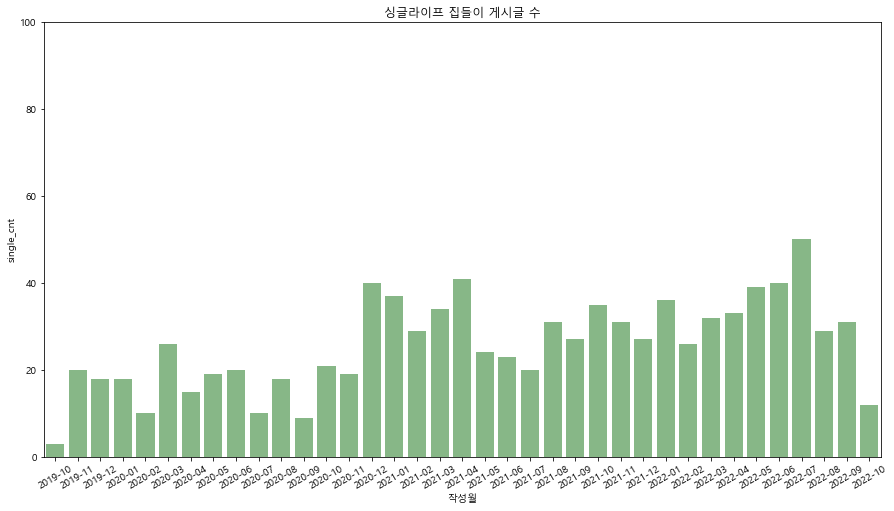

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

plt.figure(figsize = (15,8))
ax = sns.barplot(data=hou_single, x="작성월", y="single_cnt", color='green', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.ylim([0, 100])
plt.title('싱글라이프 집들이 게시글 수')
plt.show()

### > 신혼부부

In [187]:
hou_newlyweds = house[:][house['가족형태']=='신혼부부']
hou_newlyweds = pd.DataFrame(hou_newlyweds.groupby('작성월')['id'].count())
hou_newlyweds = hou_newlyweds.rename(columns={'id':'newlyweds_cnt'})
hou_newlyweds = hou_newlyweds.reset_index()
hou_newlyweds

,작성월,newlyweds_cnt
0,2019-10,8
1,2019-11,40
2,2019-12,35
3,2020-01,58
4,2020-02,45
5,2020-03,48
6,2020-04,48
7,2020-05,54
8,2020-06,43
9,2020-07,49


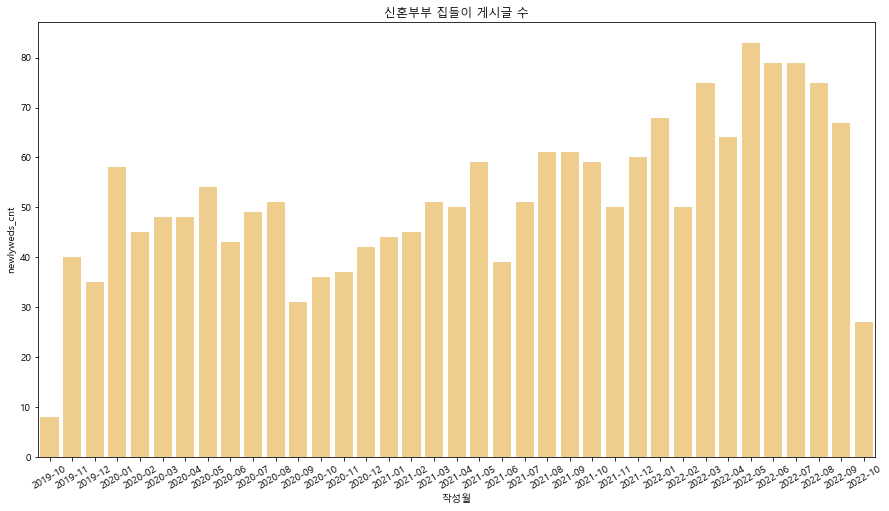

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

plt.figure(figsize = (15,8))
ax = sns.barplot(data=hou_newlyweds, x="작성월", y="newlyweds_cnt", color='orange', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('신혼부부 집들이 게시글 수')
plt.show()

### > 아기가 있는 집

In [189]:
hou_baby = house[:][house['가족형태']=='아기가 있는 집']
hou_baby = pd.DataFrame(hou_baby.groupby('작성월')['id'].count())
hou_baby = hou_baby.rename(columns={'id':'baby_cnt'})
hou_baby = hou_baby.reset_index()
hou_baby

,작성월,baby_cnt
0,2019-10,3
1,2019-11,16
2,2019-12,15
3,2020-01,13
4,2020-02,17
5,2020-03,16
6,2020-04,22
7,2020-05,22
8,2020-06,21
9,2020-07,26


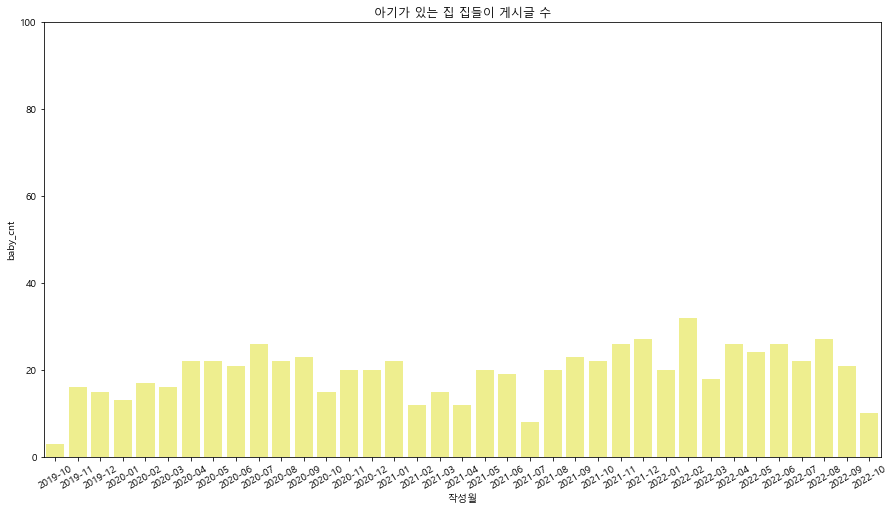

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

plt.figure(figsize = (15,8))
ax = sns.barplot(data=hou_baby, x="작성월", y="baby_cnt", color='yellow', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.ylim([0, 100])
plt.title('아기가 있는 집 집들이 게시글 수')
plt.show()

## > 가족형태별 2020-2022 집들이글 게시글 작성수

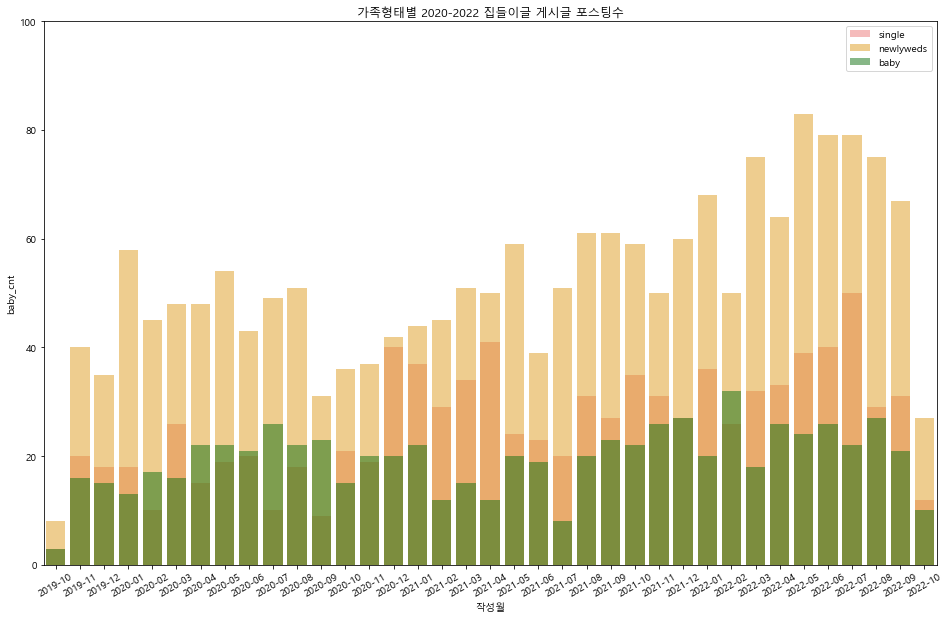

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

plt.figure(figsize = (16,10))
ax = sns.barplot(data=hou_single, x="작성월", y="single_cnt", color='red', alpha=0.3, label='single')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

ax = sns.barplot(data=hou_newlyweds, x="작성월", y="newlyweds_cnt", color='orange', alpha=0.5, label='newlyweds')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

ax = sns.barplot(data=hou_baby, x="작성월", y="baby_cnt", color='green', alpha=0.5, label='baby')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.ylim([0, 100])

plt.title('가족형태별 2020-2022 집들이글 게시글 포스팅수')
plt.legend()
plt.show()

#### - 상품 리뷰수 또는 판매량 순위와 상품이 포함된 글의 평균 (누적)조회수와의 상관관계
#### - 누적 조회수가 높은 게시글에 태깅된 상품(카테고리 순위가 높은)이 인기순, 판매량순위에 있는지

In [ ]:
house2 = pd.read_csv('house2.csv')
house2.sort_values(by='조회', ascending=False)

In [5]:
import pandas as pd
prd_popul_rnk = pd.read_csv('prd_popul_rnk.csv')
prd_popul_rnk.head(20)

,인기랭킹,대분류,상품url
0,1,가구,https://ohou.se/productions/1458133/selling
1,2,가구,https://ohou.se/productions/441967/selling
2,3,가구,https://ohou.se/productions/302464/selling
3,4,가구,https://ohou.se/productions/1088381/selling
4,5,가구,https://ohou.se/productions/823405/selling
5,6,가구,https://ohou.se/productions/75676/selling
6,7,가구,https://ohou.se/productions/1173091/selling
7,8,가구,https://ohou.se/productions/1640072/selling
8,9,가구,https://ohou.se/productions/903964/selling
9,10,가구,https://ohou.se/productions/209749/selling


In [77]:
prd_rnk = house_prd.merge(prd_popul_rnk, how='left', on='상품url')
prd_rnk

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,인기랭킹,대분류
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0,43.0,가구
1,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0,NaN,NaN
2,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0,NaN,NaN
3,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0,NaN,NaN
4,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231385,4691,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0,70127,3016,855,73,https://ohou.se/projects/19720/detail?affect_t...,2020-01,https://ohou.se/productions/224590/selling,아키드리머,악세스시리즈01 한정판 아트포스터,"['데코·식물', '홈갤러리', '액자']",NaN,NaN,32.0,3.0,NaN,NaN
231386,4691,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0,70127,3016,855,73,https://ohou.se/projects/19720/detail?affect_t...,2020-01,https://ohou.se/productions/224582/selling,아키드리머,[해외]Sand Rug 01,"['패브릭', '러그·카페트', '라탄·수초러그']",NaN,NaN,26.0,8.0,NaN,NaN
231387,4691,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0,70127,3016,855,73,https://ohou.se/projects/19720/detail?affect_t...,2020-01,https://ohou.se/productions/224584/selling,럭키보이선데이,Pale Nulle,"['데코·식물', '인테리어소품', '장식소품']",NaN,NaN,12.0,7.0,NaN,NaN
231388,4691,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0,70127,3016,855,73,https://ohou.se/projects/19720/detail?affect_t...,2020-01,https://ohou.se/productions/11729/selling,이케아,FROSTA 스툴 3colors,"['가구', '의자', '스툴·벤치']",NaN,NaN,17600.0,1996.0,NaN,NaN


In [90]:
prd_rnk['작성일'] = pd.to_datetime(prd_rnk['작성일'], format='%Y-%m-%d', errors='coerce')

In [119]:
prd_rnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231390 entries, 0 to 231389
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      231390 non-null  int64         
 1   작성일     231390 non-null  datetime64[ns]
 2   제목      231390 non-null  object        
 3   가족형태    231390 non-null  object        
 4   공간      231390 non-null  object        
 5   평수구간    231390 non-null  int64         
 6   스타일     231390 non-null  object        
 7   세부공사    231390 non-null  object        
 8   분야      231390 non-null  object        
 9   작업      231390 non-null  object        
 10  예산      231390 non-null  int64         
 11  조회      231390 non-null  int64         
 12  스크랩     231390 non-null  int64         
 13  좋아요     231390 non-null  int64         
 14  댓글      231390 non-null  int64         
 15  url     231390 non-null  object        
 16  작성월     231390 non-null  object        
 17  상품url   231390 non-null  obje

상품url
https://ohou.se/productions/999897/selling    1
https://ohou.se/productions/999934/selling    2
https://ohou.se/productions/999968/selling    1
https://ohou.se/productions/99997/selling     1
https://ohou.se/productions/999990/selling    1
Name: id, dtype: int64

In [110]:
pd.set_option('display.max_rows',None)
prd_rnk.sort_values(by='인기랭킹').head(500)
#prd_rnk[['공간','조회','상품명','인기랭킹','리뷰수']].sort_values(by='리뷰수', ascending=False).head(500)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,인기랭킹,대분류
99315,1670,2021-12-20,화이트에 베이지! 아치가 돋보이는 부부의 보금자리,신혼부부,아파트,45,내추럴,"주방리모델링, 조명시공, 폴딩도어, 중문, 가벽&파티션",리모델링,전문가,7500,43413,909,229,53,https://ohou.se/projects/69755/detail?affect_t...,2021-12,https://ohou.se/productions/224502/selling,아침향기,목화 유칼리툽스 조화 북유럽 가랜드,"['데코·식물', '플라워·식물', '리스·가랜드']",12900.0,3897.0,27779.0,3267.0,2.0,데코·식물
82062,1393,2022-02-13,"칼각 주방에 색감 한방울, 개방감 살린 20평대 아파트",아기가 있는 집,아파트,25,내추럴,0,리모델링,전문가,0,49212,1383,341,70,https://ohou.se/projects/78515/detail?affect_t...,2022-02,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
72460,1228,2022-03-18,알록달록 소품이 포인트! 아이를 위해 시작한 리모델링,취학 자녀가 있는 집,아파트,35,내추럴,"주방리모델링, 조명시공, 중문, 가벽&파티션",리모델링,전문가,9500,22867,410,100,33,https://ohou.se/projects/80496/detail?affect_t...,2022-03,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
20567,323,2022-08-10,"1947年, 올드 하우스에 펼쳐진 모던 내추럴 홈'st",기타,단독주택,75,내추럴,"원목마루, 주방리모델링, 조명시공, 폴딩도어, 가벽&파티션",리모델링,전문가,0,14536,306,56,19,https://ohou.se/projects/65088/detail?affect_t...,2022-08,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
20715,326,2022-08-10,"본가에서도 예쁘게 살래요, 포근하고 따사로운 방꾸미기",부모님과 함께 사는 집,기타,75,내추럴,0,홈스타일링,셀프•DIY,0,24061,1085,156,12,https://ohou.se/projects/107837/detail?affect_...,2022-08,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
26048,418,2022-07-27,텐트와 장비만 있다면 어디로든 떠날 수 있어! 😎,신혼부부,기타,5,0,0,홈스타일링,셀프•DIY,0,4506,126,26,9,https://ohou.se/projects/103787/detail?affect_...,2022-07,https://ohou.se/productions/224502/selling,아침향기,목화 유칼리툽스 조화 북유럽 가랜드,"['데코·식물', '플라워·식물', '리스·가랜드']",12900.0,3897.0,27779.0,3267.0,2.0,데코·식물
7841,123,2022-09-17,"엄마의 취미는 요리조리 집꾸미기, 심플함에 포인트 톡!",취학 자녀가 있는 집,아파트,25,모던,0,홈스타일링,셀프•DIY,0,17650,391,102,10,https://ohou.se/projects/123365/detail?affect_...,2022-09,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
132633,2280,2021-08-23,뷰 맛집 복층 오피스텔에서 시작한 첫 번째 집 꾸미기,싱글라이프,원룸&오피스텔,5,유니크&믹스매치,0,홈스타일링,셀프•DIY,0,72779,1990,437,128,https://ohou.se/projects/59229/detail?affect_t...,2021-08,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
29669,482,2022-07-16,집 안에 작은 텃밭을 들였어요🌱 둘만의 리틀포레스트,신혼부부,아파트,25,내추럴,0,홈스타일링,셀프•DIY,300,23062,508,108,23,https://ohou.se/projects/108621/detail?affect_...,2022-07,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리
114944,1947,2021-10-25,전철이 지나가는 쓰리룸에서 시작하는 20대 첫 독립,기타,빌라&연립,15,내추럴,0,홈스타일링,셀프•DIY,100,57176,1981,477,35,https://ohou.se/projects/62247/detail?affect_t...,2021-10,https://ohou.se/productions/801782/selling,에이치앤아이,신규컬러 2종 출시! 5단 360도 회전 이동식 네모 트롤리 8colors,"['수납·정리', '서랍장·트롤리', '트롤리·이동식선반']",91900.0,3434.0,62058.0,2780.0,2.0,수납·정리


In [116]:
len(prd_rnk['상품명'][prd_rnk['인기랭킹'].isnull()].unique())

93427

In [117]:
len(prd_rnk['상품명'].unique())

95323

In [107]:
import pingouin as pg
pg.corr(prd_rnk['조회'],prd_rnk['인기랭킹'])
# pg.corr(x,  y,  alternative='two-sided', method='pearson', kwargs)

,n,r,CI95%,p-val,BF10,power
pearson,24166,-0.001049,"[-0.01, 0.01]",0.870452,0.008,0.053052


In [108]:
import pingouin as pg
pg.corr(prd_rnk['조회'],prd_rnk['리뷰수'])
# pg.corr(x,  y,  alternative='two-sided', method='pearson', kwargs)

,n,r,CI95%,p-val,BF10,power
pearson,148713,0.049322,"[0.04, 0.05]",9.341963e-81,1.452e+76,1.0


In [109]:
import pingouin as pg
pg.corr(prd_rnk['인기랭킹'],prd_rnk['리뷰수'])
# pg.corr(x,  y,  alternative='two-sided', method='pearson', kwargs)

,n,r,CI95%,p-val,BF10,power
pearson,24117,-0.447705,"[-0.46, -0.44]",0.0,inf,1.0


In [118]:
pg.corr(prd_rnk['스크랩수'],prd_rnk['인기랭킹'])

,n,r,CI95%,p-val,BF10,power
pearson,24166,-0.427507,"[-0.44, -0.42]",0.0,inf,1.0


In [123]:
pg.corr(prd_rnk['스크랩수'],prd_rnk['리뷰수'])

,n,r,CI95%,p-val,BF10,power
pearson,148689,0.815573,"[0.81, 0.82]",0.0,inf,1.0


In [124]:
pg.corr(prd_rnk['스크랩수'],prd_rnk['스크랩'])

,n,r,CI95%,p-val,BF10,power
pearson,231112,0.034284,"[0.03, 0.04]",4.586463e-61,2.739e+56,1.0


In [130]:
prd_rnk.groupby('상품url')['상품명'].count().value_counts()

1      62072
2      15346
3       6406
4       3370
5       1986
6       1388
7        966
8        748
9        475
10       413
11       337
12       272
13       219
14       205
15       175
16       129
17       125
19       105
18       102
20        82
22        79
21        70
25        52
24        52
23        49
26        46
30        40
29        38
31        37
27        35
28        31
33        23
32        23
34        20
41        20
40        19
35        19
37        18
38        17
36        15
42        12
57        11
51        11
53        11
45        10
44        10
39        10
48         9
56         9
43         9
46         9
52         8
65         8
47         8
50         8
49         8
59         7
63         6
80         6
55         6
61         5
78         5
58         4
64         4
60         4
66         4
77         3
82         3
54         3
177        2
86         2
94         2
105        2
92         2
115        2
85         2
103        2

In [144]:
prd_rnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231390 entries, 0 to 231389
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      231390 non-null  int64         
 1   작성일     231390 non-null  datetime64[ns]
 2   제목      231390 non-null  object        
 3   가족형태    231390 non-null  object        
 4   공간      231390 non-null  object        
 5   평수구간    231390 non-null  int64         
 6   스타일     231390 non-null  object        
 7   세부공사    231390 non-null  object        
 8   분야      231390 non-null  object        
 9   작업      231390 non-null  object        
 10  예산      231390 non-null  int64         
 11  조회      231390 non-null  int64         
 12  스크랩     231390 non-null  int64         
 13  좋아요     231390 non-null  int64         
 14  댓글      231390 non-null  int64         
 15  url     231390 non-null  object        
 16  작성월     231390 non-null  object        
 17  상품url   231390 non-null  obje

In [145]:
from collections import Counter
Counter(prd_rnk['상품url']).most_common(300)

[('https://ohou.se/productions/204619/selling', 492),
 ('https://ohou.se/productions/438844/selling', 447),
 ('https://ohou.se/productions/354736/selling', 400),
 ('https://ohou.se/productions/204623/selling', 331),
 ('https://ohou.se/productions/403500/selling', 305),
 ('https://ohou.se/productions/137519/selling', 268),
 ('https://ohou.se/productions/869594/selling', 229),
 ('https://ohou.se/productions/547677/selling', 210),
 ('https://ohou.se/productions/1020795/selling', 199),
 ('https://ohou.se/productions/544649/selling', 193),
 ('https://ohou.se/productions/65810/selling', 177),
 ('https://ohou.se/productions/237059/selling', 177),
 ('https://ohou.se/productions/97064/selling', 176),
 ('https://ohou.se/productions/176428/selling', 171),
 ('https://ohou.se/productions/123463/selling', 168),
 ('https://ohou.se/productions/441917/selling', 158),
 ('https://ohou.se/productions/138894/selling', 155),
 ('https://ohou.se/productions/544635/selling', 149),
 ('https://ohou.se/production

In [176]:
from collections import Counter
Counter(prd_rnk['상품url']).most_common()[-300:]

[('https://ohou.se/productions/229085/selling', 1),
 ('https://ohou.se/productions/229098/selling', 1),
 ('https://ohou.se/productions/109542/selling', 1),
 ('https://ohou.se/productions/1038420/selling', 1),
 ('https://ohou.se/productions/103976/selling', 1),
 ('https://ohou.se/productions/34675/selling', 1),
 ('https://ohou.se/productions/228384/selling', 1),
 ('https://ohou.se/productions/177838/selling', 1),
 ('https://ohou.se/productions/228381/selling', 1),
 ('https://ohou.se/productions/228376/selling', 1),
 ('https://ohou.se/productions/228379/selling', 1),
 ('https://ohou.se/productions/228389/selling', 1),
 ('https://ohou.se/productions/81125/selling', 1),
 ('https://ohou.se/productions/180581/selling', 1),
 ('https://ohou.se/productions/168724/selling', 1),
 ('https://ohou.se/productions/200428/selling', 1),
 ('https://ohou.se/productions/229020/selling', 1),
 ('https://ohou.se/productions/161149/selling', 1),
 ('https://ohou.se/productions/229012/selling', 1),
 ('https://oh

In [177]:
prd_popul_rnk = pd.read_csv("prd_popul_rnk.csv")

cnt = 1
pop_prd = 0
for i in Counter(prd_rnk['상품url']).most_common()[-300:]:
    if i[0] in list(prd_popul_rnk['상품url']):
        pop_prd += 1
        # cnt += 1
    else:
        pass

print(pop_prd)
# Counter(prd_rnk['상품url']).most_common(300)[i][0]

2


In [165]:
prd_popul_rnk = pd.read_csv("prd_popul_rnk.csv")
type(list(prd_popul_rnk['상품url'])[0])

str

## ● 가족형태별/공간별 많이 태깅된 상품 카테고리

In [24]:
house_prd = house.merge(prd_details_fixed, how='inner', on='id')
house_prd.head()

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0
1,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0
2,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0
3,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0
4,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0


In [26]:
house_prd['가족형태'].value_counts()

신혼부부                                   97615
싱글라이프                                  40483
아기가 있는 집                               38193
취학 자녀가 있는 집                            27301
부모님과 함께 사는 집                           13241
기타                                      8416
신혼부부, 아기가 있는 집                          1669
신혼부부, 기타                                1419
아기가 있는 집, 취학 자녀가 있는 집                   1370
싱글라이프, 기타                                652
아기가 있는 집, 기타                             230
취학 자녀가 있는 집, 기타                          189
취학 자녀가 있는 집, 부모님과 함께 사는 집                108
부모님과 함께 사는 집, 기타                         100
아기가 있는 집, 부모님과 함께 사는 집                    88
신혼부부, 부모님과 함께 사는 집                        65
신혼부부, 아기가 있는 집, 기타                        63
싱글라이프, 부모님과 함께 사는 집                       51
싱글라이프, 신혼부부, 기타                           47
아기가 있는 집, 취학 자녀가 있는 집, 기타                 45
아기가 있는 집, 취학 자녀가 있는 집, 부모님과 함께 사는 집       39
싱글라이프, 부모님과 함께 사는 집, 기타                    6
Name: 가족형태

In [31]:
house_prd['공간'].value_counts()

아파트        154770
원룸&오피스텔     26763
빌라&연립       20295
단독주택        19877
기타           9008
상업공간          380
사무공간          297
Name: 공간, dtype: int64

In [58]:
house[:][(house['가족형태']=='부모님과 함께 사는 집')&(house['공간']=='아파트')] # 153개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
136,136,2022-09-17,내 심장의 색깔은 핑크💘 달콤한 솜사탕 같은 3평방,부모님과 함께 사는 집,아파트,5,유니크&믹스매치,0,홈스타일링,셀프•DIY,0,15096,712,148,21,https://ohou.se/projects/123011/detail?affect_...,2022-09
287,287,2022-08-17,"머무는 동안 위안이 될 수 있도록, 나만의 4평 안식처",부모님과 함께 사는 집,아파트,5,모던,0,홈스타일링,셀프•DIY,0,30705,1462,312,26,https://ohou.se/projects/115750/detail?affect_...,2022-08
382,382,2022-08-02,식물과 잘 어울리는 엔틱 스타일 빈티지 플랜테리어 🌿,부모님과 함께 사는 집,아파트,35,0,0,홈스타일링,셀프•DIY,0,11421,591,68,14,https://ohou.se/projects/111169/detail?affect_...,2022-08
392,392,2022-07-30,"웜톤🧸 or 쿨톤💎, 인테리어 퍼스널 컬러 찾기",부모님과 함께 사는 집,아파트,35,모던,0,홈스타일링,셀프•DIY,0,35626,2332,387,34,https://ohou.se/projects/112544/detail?affect_...,2022-07
455,455,2022-07-21,산과 달이 보이는 3평 방에서 보낸 사계절,부모님과 함께 사는 집,아파트,5,모던,0,홈스타일링,셀프•DIY,0,62373,3995,779,60,https://ohou.se/projects/109480/detail?affect_...,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,4699,2019-12-30,부모님 집에서 원목 인테리어로 살아남기,부모님과 함께 사는 집,아파트,5,"모던, 내추럴",발코니확장,홈스타일링,반셀프,100,77291,1593,406,35,https://ohou.se/projects/19168/detail?affect_t...,2019-12
4723,4723,2019-12-20,오래된 것들은 제게 큰 설렘을 안겨줘요,부모님과 함께 사는 집,아파트,25,"빈티지&레트로, 러블리&로맨틱",0,홈스타일링,셀프•DIY,200,62790,2203,602,41,https://ohou.se/projects/18939/detail?affect_t...,2019-12
4758,4758,2019-12-09,"초등학생 때부터 살던 방, 지금의 내게 맞게 바꾸기!",부모님과 함께 사는 집,아파트,45,내추럴,0,홈스타일링,셀프•DIY,100,53133,2100,600,48,https://ohou.se/projects/19495/detail?affect_t...,2019-12
4778,4778,2019-12-03,함께 사는 집ㅣ각자의 반경을 존중하고 가꾸는 일,부모님과 함께 사는 집,아파트,35,"모던, 미니멀&심플, 내추럴","조명시공, 중문, 아트월, 발코니확장",홈스타일링,반셀프,1300,33153,837,242,26,https://ohou.se/projects/18063/detail?affect_t...,2019-12


In [56]:
house[:][(house['가족형태']=='신혼부부')&(house['공간']=='아파트')] # 1531 개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...,2022-10
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,https://ohou.se/projects/116945/detail?affect_...,2022-10
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,https://ohou.se/projects/127436/detail?affect_...,2022-10
6,6,2022-10-07,사계절을 품은 액자창이 포인트! 따뜻한 무드의 신혼집,신혼부부,아파트,35,내추럴,0,홈스타일링,셀프•DIY,0,7017,74,30,6,https://ohou.se/projects/126368/detail?affect_...,2022-10
12,12,2022-10-07,"디자이너 부부의 우드 하우스, 단정하고 따뜻하게",신혼부부,아파트,35,내추럴,0,리모델링,반셀프,1700,11245,391,85,27,https://ohou.se/projects/127079/detail?affect_...,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4883,2019-10-31,미니멀과 홈카페의 만남,신혼부부,아파트,75,미니멀&심플,"원목마루, 조명시공, 아트월",홈스타일링,반셀프,2000,56641,1092,323,52,https://ohou.se/projects/17256/detail?affect_t...,2019-10
4886,4886,2019-10-30,우리 마음에 쏙 들게! 작지만 알차게! #24평_신혼집,신혼부부,아파트,25,"모던, 내추럴, 북유럽",0,홈스타일링,셀프•DIY,0,77469,1256,405,47,https://ohou.se/projects/17202/detail?affect_t...,2019-10
4894,4894,2019-10-27,오늘의 홈카페 | 공릉댁님,신혼부부,아파트,15,"모던, 미니멀&심플",0,부분공사,전문가,0,25731,488,186,37,https://ohou.se/projects/17314/detail?affect_t...,2019-10
4895,4895,2019-10-27,25년 된 신혼집 반셀프 인테리어 도전기,신혼부부,아파트,35,"모던, 미니멀&심플, 북유럽","주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,반셀프,3000,82539,2865,723,67,https://ohou.se/projects/17105/detail?affect_t...,2019-10


In [73]:
house[:][(house['가족형태']=='신혼부부')&(house['공간']=='원룸&오피스텔')] # 50개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
133,133,2022-09-17,핑크빛 꿈을 꾸는 프렌치 하우스🎀 귀염뽀작 토이룸까지,신혼부부,원룸&오피스텔,25,프렌치&프로방스,0,홈스타일링,셀프•DIY,0,11629,223,71,38,https://ohou.se/projects/120883/detail?affect_...,2022-09
138,138,2022-09-17,"작은 집도 예쁘게, 도자기 감성을 담은 12평 신혼집",신혼부부,원룸&오피스텔,15,0,0,홈스타일링,셀프•DIY,0,17881,314,97,19,https://ohou.se/projects/121770/detail?affect_...,2022-09
198,198,2022-09-04,"우리의 첫 신혼집, 계절의 변화가 느껴지는 4베이에서",신혼부부,원룸&오피스텔,25,모던,0,홈스타일링,셀프•DIY,0,18763,429,108,41,https://ohou.se/projects/118681/detail?affect_...,2022-09
295,295,2022-08-15,서로 다른 두 사람의 취향이 은은하게 조화된 신혼집,신혼부부,원룸&오피스텔,25,모던,0,리모델링,전문가,0,20456,433,109,47,https://ohou.se/projects/116331/detail?affect_...,2022-08
355,355,2022-08-05,신혼인데 작은 집? 오히려 좋아!,신혼부부,원룸&오피스텔,15,내추럴,0,홈스타일링,셀프•DIY,0,29220,899,228,38,https://ohou.se/projects/96991/detail?affect_t...,2022-08
561,561,2022-07-04,창 밖의 노을로 인테리어가 완성되는 베이지 하우스,신혼부부,원룸&오피스텔,25,모던,"주방리모델링, 조명시공",리모델링,전문가,4000,25819,542,115,61,https://ohou.se/projects/108728/detail?affect_...,2022-07
641,641,2022-06-22,찰나의 순간이 소중한 일상으로.. 캠핑의 마법🔮✨,신혼부부,원룸&오피스텔,5,0,0,홈스타일링,셀프•DIY,0,6929,160,52,4,https://ohou.se/projects/94870/detail?affect_t...,2022-06
654,654,2022-06-21,노는 게 제일 좋아! 13년차 커플 캠퍼가 만난 텐트들,신혼부부,원룸&오피스텔,5,0,0,홈스타일링,셀프•DIY,0,8703,212,54,12,https://ohou.se/projects/96781/detail?affect_t...,2022-06
800,800,2022-05-29,잠깐 살아도 예쁘게! 공간마다 컨셉이 다른 복층 신혼집,신혼부부,원룸&오피스텔,25,내추럴,0,홈스타일링,셀프•DIY,800,27062,691,155,30,https://ohou.se/projects/99275/detail?affect_t...,2022-05
872,872,2022-05-19,"16평대 오피스텔 신혼집, 모던하고 따뜻한 무드를 담아",신혼부부,원룸&오피스텔,15,모던,0,홈스타일링,셀프•DIY,700,28114,654,125,11,https://ohou.se/projects/75310/detail?affect_t...,2022-05


In [62]:
house[:][(house['가족형태']=='싱글라이프')&(house['공간']=='원룸&오피스텔')] # 554개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
5,5,2022-10-07,게으른 집순이가 폭신한 하루를 보내는 복층 오피스텔,싱글라이프,원룸&오피스텔,15,모던,0,홈스타일링,셀프•DIY,0,8658,289,79,18,https://ohou.se/projects/125983/detail?affect_...,2022-10
9,9,2022-10-07,자취를 하고 나서 퇴근 후의 삶이 행복해졌어요💗,싱글라이프,원룸&오피스텔,5,내추럴,0,홈스타일링,셀프•DIY,100,72183,3525,725,46,https://ohou.se/projects/100919/detail?affect_...,2022-10
18,18,2022-10-07,좋아하는 걸로 채우다 보니 완성! 온라인 MD의 자취방,싱글라이프,원룸&오피스텔,15,내추럴,0,홈스타일링,셀프•DIY,0,7209,197,42,14,https://ohou.se/projects/126276/detail?affect_...,2022-10
24,24,2022-10-07,피규어를 베고 LP를 덮고 자는 10평대 오피스텔,싱글라이프,원룸&오피스텔,15,내추럴,0,홈스타일링,셀프•DIY,0,8246,271,61,10,https://ohou.se/projects/125197/detail?affect_...,2022-10
29,29,2022-10-07,오히려 돌봄을 받는 건 나- 초보 식집사의 치유의 공간,싱글라이프,원룸&오피스텔,5,0,0,홈스타일링,셀프•DIY,0,7640,188,48,8,https://ohou.se/projects/125416/detail?affect_...,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4864,2019-11-06,취향과 아이디어가 녹아있는 자취 5년 차의 분리형 원룸,싱글라이프,원룸&오피스텔,5,"모던, 내추럴, 유니크&믹스매치",0,홈스타일링,셀프•DIY,100,149655,2871,654,76,https://ohou.se/projects/17748/detail?affect_t...,2019-11
4870,4870,2019-11-04,기분 좋은 불편함에 이끌려서 만난 지금의 집,싱글라이프,원룸&오피스텔,15,빈티지&레트로,0,홈스타일링,셀프•DIY,200,89337,3006,795,58,https://ohou.se/projects/17654/detail?affect_t...,2019-11
4878,4878,2019-11-02,큰 바다를 안은 나의 작은 원룸.,싱글라이프,원룸&오피스텔,15,미니멀&심플,원목마루,홈스타일링,셀프•DIY,100,70756,1244,524,69,https://ohou.se/projects/15905/detail?affect_t...,2019-11
4884,4884,2019-10-31,고양이 두 마리와 싱글라이프 : 쾌적한 투룸 꾸미기,싱글라이프,원룸&오피스텔,15,"북유럽, 빈티지&레트로, 유니크&믹스매치",0,홈스타일링,셀프•DIY,100,71624,1311,436,54,https://ohou.se/projects/16605/detail?affect_t...,2019-10


In [68]:
house[:][(house['가족형태']=='아기가 있는 집')&(house['공간']=='아파트')] # 599개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...,2022-10
7,7,2022-10-07,알록달록은 꼭꼭 숨겨라! 아기와 함께 하는 베이지하우스,아기가 있는 집,아파트,35,모던,조명시공,홈스타일링,셀프•DIY,500,5620,100,29,5,https://ohou.se/projects/117185/detail?affect_...,2022-10
8,8,2022-10-07,헌집줄게 새집다오🏘 살던 집을 리모델링 해 새집처럼!,아기가 있는 집,아파트,25,모던,0,리모델링,전문가,7000,54268,1124,368,116,https://ohou.se/projects/110355/detail?affect_...,2022-10
11,11,2022-10-07,"감쪽같은 매트, 화이트 앤 우드 컨셉 37평 아파트",아기가 있는 집,아파트,35,내추럴,"주방리모델링, 조명시공, 가벽&파티션, 슬라이딩도어, 아트월",리모델링,전문가,6800,6859,105,38,23,https://ohou.se/projects/127434/detail?affect_...,2022-10
27,27,2022-10-07,"구축 리모델링, 기본에 충실하되 포인트도 놓치지 않아요",아기가 있는 집,아파트,25,모던,"주방리모델링, 조명시공, 중문, 슬라이딩도어, 발코니확장",리모델링,전문가,5500,12396,187,53,14,https://ohou.se/projects/126659/detail?affect_...,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,4868,2019-11-05,우리 가족이 좋아하는 집! 시공 없이도 가능해요!,아기가 있는 집,아파트,35,빈티지&레트로,중문,홈스타일링,전문가,1500,34062,665,166,14,https://ohou.se/projects/17591/detail?affect_t...,2019-11
4877,4877,2019-11-02,모던함이 주는 편안함과 컬러가 어우러진 집,아기가 있는 집,아파트,25,내추럴,0,홈스타일링,셀프•DIY,300,69694,1026,217,24,https://ohou.se/projects/17284/detail?affect_t...,2019-11
4882,4882,2019-11-01,오래도록 함께할 가구와 오래도록 보아도 아름다운 뷰,아기가 있는 집,아파트,65,"모던, 내추럴","헤링본 마루, 원목마루, 조명시공, 중문",부분공사,반셀프,0,62059,1184,384,35,https://ohou.se/projects/16373/detail?affect_t...,2019-11
4892,4892,2019-10-28,뉴트럴 톤에 그린 한 스푼ㅣ세 식구가 지내는 예쁜 집,아기가 있는 집,아파트,55,"모던, 내추럴",0,리모델링,전문가,0,68539,1992,568,93,https://ohou.se/projects/17172/detail?affect_t...,2019-10


In [75]:
house[:][(house['가족형태']=='신혼부부')&(house['공간']=='단독주택')] # 138개

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url,작성월
121,121,2022-09-17,동화 속 주인공이 살 것만 같은 유럽풍 빈티지 주택,신혼부부,단독주택,65,빈티지&레트로,0,홈스타일링,셀프•DIY,0,19711,770,284,19,https://ohou.se/projects/123159/detail?affect_...,2022-09
162,162,2022-09-10,가족과 함께하기 위해 지은 주택이 건네는 따뜻한 위로,신혼부부,단독주택,25,빈티지&레트로,0,건축,반셀프,9000,13943,288,90,32,https://ohou.se/projects/119977/detail?affect_...,2022-09
173,173,2022-09-08,"시간이 닿은 숲, 정다운 한옥 시골집을 고쳐 살아요",신혼부부,단독주택,45,한국&아시아,0,리모델링,반셀프,0,27292,489,212,50,https://ohou.se/projects/119281/detail?affect_...,2022-09
185,185,2022-09-06,달나무집 | 부부의 놀이터가 된 산골마을 단독주택,신혼부부,단독주택,45,빈티지&레트로,"주방리모델링, 조명시공, 중문",리모델링,전문가,0,31620,1076,365,146,https://ohou.se/projects/120613/detail?affect_...,2022-09
257,257,2022-08-23,"우디한 무드를 담다, 집사부부의 50살 구옥 고치기",신혼부부,단독주택,55,빈티지&레트로,0,리모델링,반셀프,0,39028,1281,462,88,https://ohou.se/projects/117566/detail?affect_...,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,4718,2019-12-23,"건축가의 집 | 협소주택, 10평짜리 땅의 재발견",신혼부부,단독주택,25,미니멀&심플,0,건축,전문가,0,235050,2629,1431,202,https://ohou.se/projects/20239/detail?affect_t...,2019-12
4737,4737,2019-12-16,"미국 캘리포니아주, 휴양지 느낌의 아늑한 신혼 공간",신혼부부,단독주택,55,"모던, 내추럴, 클래식&앤틱",0,리모델링,반셀프,0,47996,1361,481,40,https://ohou.se/projects/18474/detail?affect_t...,2019-12
4776,4776,2019-12-04,파란 주방이 예쁜 복층집,신혼부부,단독주택,65,0,"주방리모델링, 조명시공, 중문, 가벽&파티션",리모델링,전문가,10000,32684,743,174,23,https://ohou.se/projects/18266/detail?affect_t...,2019-12
4810,4810,2019-11-22,이케아로 꾸민 화이트 주택 리모델링,신혼부부,단독주택,35,"모던, 미니멀&심플, 내추럴, 북유럽","대리석 바닥, 포세린타일, 주방리모델링, 조명시공, 중문, 슬라이딩도어, 아트월, ...",리모델링,전문가,0,78650,1904,698,74,https://ohou.se/projects/17563/detail?affect_t...,2019-11


In [57]:
hou_newlywed = house_prd[:][(house_prd['가족형태']=='신혼부부')&(house_prd['공간']=='아파트')]
hou_newlywed['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x : x/1531)

'가구'       11.009798
'데코·식물'    10.328543
'주방용품'      8.716525
'가전'        7.384716
'패브릭'       4.363161
'조명'        3.237753
'수납·정리'     2.750490
'생활용품'      2.286741
'생필품'       0.774004
'반려동물'      0.446767
            0.311561
'캠핑용품'      0.203135
'유아·아동'     0.175049
'식품'        0.037231
Name: 카테고리, dtype: float64

In [64]:
hou_parents = house_prd[:][(house_prd['가족형태']=='부모님과 함께 사는 집')&(house_prd['공간']=='아파트')]
hou_parents['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x : x/153)

'데코·식물'    12.019608
'가구'        8.013072
'패브릭'       5.980392
'주방용품'      4.542484
'가전'        3.241830
'조명'        2.575163
'수납·정리'     1.882353
'생활용품'      0.758170
'생필품'       0.202614
'반려동물'      0.202614
            0.143791
'캠핑용품'      0.117647
'유아·아동'     0.058824
'식품'        0.019608
Name: 카테고리, dtype: float64

In [67]:
hou_single = house_prd[:][(house_prd['가족형태']=='싱글라이프')&(house_prd['공간']=='원룸&오피스텔')]
hou_single['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x : x/554)

'데코·식물'    9.593863
'가구'       7.759928
'주방용품'     6.561372
'패브릭'      5.862816
'가전'       3.684116
'조명'       2.276173
'수납·정리'    2.075812
'생활용품'     1.064982
'생필품'      0.480144
'반려동물'     0.189531
'유아·아동'    0.148014
           0.120939
'캠핑용품'     0.093863
'식품'       0.023466
Name: 카테고리, dtype: float64

In [69]:
hou_baby = house_prd[:][(house_prd['가족형태']=='아기가 있는 집')&(house_prd['공간']=='아파트')]
hou_baby['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x : x/599) 

'데코·식물'    10.789649
'가구'       10.707846
'가전'        6.964942
'주방용품'      6.709516
'유아·아동'     4.971619
'패브릭'       4.699499
'조명'        3.429048
'수납·정리'     3.290484
'생활용품'      2.208681
'생필품'       0.696160
            0.390651
'캠핑용품'      0.200334
'반려동물'      0.150250
'식품'        0.015025
Name: 카테고리, dtype: float64

In [74]:
hou_newlywed = house_prd[:][(house_prd['가족형태']=='신혼부부')&(house_prd['공간']=='원룸&오피스텔')]
hou_newlywed['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x : x/50)

'가구'       10.88
'데코·식물'    10.48
'주방용품'      9.54
'가전'        8.66
'패브릭'       5.50
'조명'        2.80
'수납·정리'     2.50
'생활용품'      2.46
'캠핑용품'      1.60
'생필품'       1.10
            0.44
'반려동물'      0.36
'유아·아동'     0.24
'식품'        0.02
Name: 카테고리, dtype: float64

In [76]:
hou_newlywed = house_prd[:][(house_prd['가족형태']=='신혼부부')&(house_prd['공간']=='단독주택')]
hou_newlywed['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts().apply(lambda x: x/138)

'가구'       8.934783
'데코·식물'    8.673913
'가전'       5.594203
'주방용품'     5.456522
'패브릭'      3.456522
'조명'       3.094203
'생활용품'     1.949275
'수납·정리'    1.811594
'캠핑용품'     1.079710
'반려동물'     0.594203
'생필품'      0.528986
           0.398551
'유아·아동'    0.130435
'식품'       0.014493
Name: 카테고리, dtype: float64

In [45]:
hou_newlywed = house_prd[:][(house_prd['가족형태']=='신혼부부')&(house_prd['공간']=='빌라&연립')]
hou_newlywed['카테고리'].apply(lambda x : x.split(',')[0].lstrip('[').rstrip(']')).value_counts()

'가구'       1603
'데코·식물'    1519
'주방용품'      991
'패브릭'       752
'가전'        731
'조명'        462
'수납·정리'     372
'생활용품'      189
'캠핑용품'       67
'생필품'        59
'반려동물'       54
             36
'유아·아동'      14
'식품'          2
Name: 카테고리, dtype: int64